In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 134s 1us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

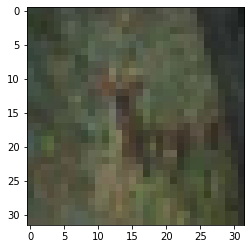

In [8]:
plt.imshow(X_train[10])

In [10]:
X_train[0].max()

255

In [11]:
X_train = X_train / 255

X_test = X_test / 255

In [12]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,num_classes=10)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten

In [23]:
model = Sequential()

## Convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
## Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

## Convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
## Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

## output layer (multi class)

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [27]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 95s 2ms/sample - loss: 1.4919 - accuracy: 0.4611 - val_loss: 1.3019 - val_accuracy: 0.5246
Epoch 2/15
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.1657 - accuracy: 0.5881 - val_loss: 1.0834 - val_accuracy: 0.6235
Epoch 3/15
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.0242 - accuracy: 0.6410 - val_loss: 1.0382 - val_accuracy: 0.6381
Epoch 4/15
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.9117 - accuracy: 0.6815 - val_loss: 1.0169 - val_accuracy: 0.6461
Epoch 5/15
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.8200 - accuracy: 0.7155 - val_loss: 0.9677 - val_accuracy: 0.6604
Epoch 6/15
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.7395 - accuracy: 0.7400 - val_loss: 0.9746 - val_accuracy: 0.6714
Epoch 7/15
50000/50000 [==============================] 

In [28]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.491907,0.46112,1.301942,0.5246
1,1.165690,0.58808,1.083391,0.6235
2,1.024180,0.64102,1.038162,0.6381
3,0.911722,0.68152,1.016854,0.6461
4,0.820030,0.71552,0.967741,0.6604
5,0.739509,0.74000,0.974629,0.6714
6,0.672150,0.76474,0.969033,0.6761


In [30]:
c.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

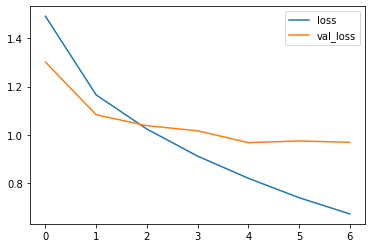

In [31]:
metrics[['loss','val_loss']].plot()

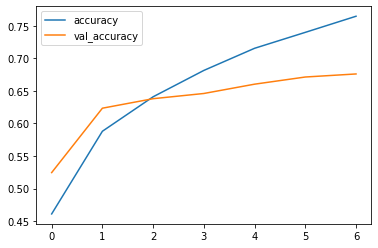

In [32]:
metrics[['accuracy','val_accuracy']].plot()

In [34]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.9690329773902893, 0.6761]

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
predictions = model.predict_classes(X_test)
predictions

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1000
           1       0.72      0.86      0.78      1000
           2       0.55      0.60      0.58      1000
           3       0.56      0.37      0.45      1000
           4       0.70      0.60      0.64      1000
           5       0.60      0.52      0.56      1000
           6       0.69      0.80      0.74      1000
           7       0.71      0.74      0.73      1000
           8       0.79      0.78      0.78      1000
           9       0.69      0.80      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.67      0.68      0.67     10000



In [38]:
print(confusion_matrix(y_test,predictions))

[[695  45  82   6  13   6  10  14  84  45]
 [ 12 858   3   2   1   0   9   0  19  96]
 [ 70  13 603  25  75  48  84  43  13  26]
 [ 29  37 103 373  62 173 108  55  21  39]
 [ 25  17  97  38 599  30  71  79  22  22]
 [ 21  12  93 143  39 517  51  88  12  24]
 [ 10  21  48  25  30  31 802   7   8  18]
 [ 21  20  43  32  36  45  21 742   3  37]
 [ 68  65  14   9   3   5   5   5 775  51]
 [ 28 110  11   8   1   4   9   9  23 797]]


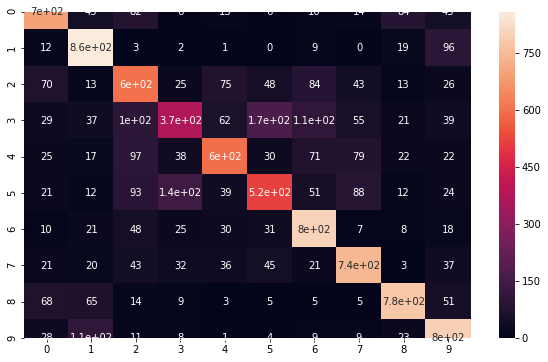

In [39]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

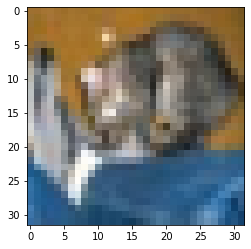

In [41]:
my_number = X_test[16]
plt.imshow(my_number)

In [42]:
y_test[16]

array([3], dtype=uint8)

In [43]:
model.predict_classes(X_test[16].reshape(1,32,32,3))

array([3], dtype=int64)